# Trabajo Práctico Interpolación de Imágenes
### Integrantes: Berretta Tomás, Bruno Tomás, Ferrari Ignacio, Kinderknetch Mauro

## Introducción: 
En este trabajo vamos a implementar tres variantes diferentes de escalado de
imágenes utilizando las siguientes funciones de interpolación:

- Vecino más cercano
- Bilineal
- Bicúbica

El vecino más cercano solo tiene en cuenta un píxel, el más cercano al punto interpolado.
La bilineal tiene en cuenta y pondera los valores en los píxeles conocidos que rodean a uno dado en una vecindad de los 2x2 píxeles más cercanos.
La bicúbica considera y pondera la vecindad de los 4x4 píxeles conocidos más cercanos, un total de 16 píxeles, los cuáles están situados a distancias distintas del píxel de valor desconocido y se da mayor peso en el cálculo a los más cercanos.

## Código
### Vecino Más Cercano:

Zoom in closest


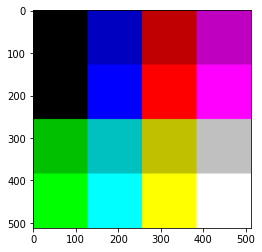

Zoom out closest


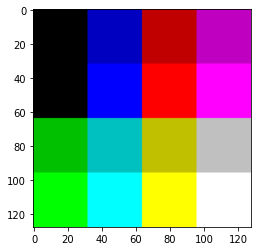

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Leer una imagen
img = plt.imread("test_1.jpg")


# Interpolar valores desconocidos
def zoom_in_closest(img):
    # Obtener la dimensión de la imagen
    height, width, t = img.shape

    # Tamaño nuevo
    new_width = width * 2
    new_height = height * 2

    # Creamos una imagen negra del doble de tamaño
    resized_image = np.zeros((new_height, new_width, t))

    # Interpola la imagen con los mas cercanos
    for i in range(new_width):
        for j in range(new_height):
            resized_image[i, j] = img[i // 2, j // 2]
            for k in range(3):
                if resized_image[i, j][k] >= 1: resized_image[i, j][k] = 1
                if resized_image[i, j][k] <= 0: resized_image[i, j][k] = 0

    # Guardamos la imagen en disco
    plt.imsave('test_bigger_closest.png', resized_image)

    # Mostramos la imagen en pantalla
    print('Zoom in closest')
    plt.imshow(resized_image, vmin=0, vmax=1)
    plt.show()


zoom_in_closest(img)


def zoom_out_closest(img):
    # Obtener la dimensión de la imagen
    height, width, t = img.shape

    # Tamaño nuevo
    new_width = width // 2
    new_height = height // 2

    # Creamos una imagen negra de la mitad del tamaño
    resized_image = np.zeros((new_height, new_width, t))

    # Interpola la imagen con los mas cercanos
    for i in range(new_width):
        for j in range(new_height):
            resized_image[i, j] = img[i * 2, j * 2]
            for k in range(3):
                if resized_image[i, j][k] >= 1: resized_image[i, j][k] = 1
                if resized_image[i, j][k] <= 0: resized_image[i, j][k] = 0

    # Guardamos la imagen en disco
    plt.imsave('test_smaller_closest.png', resized_image)

    # Mostramos la imagen en pantalla
    print('Zoom out closest')
    plt.imshow(resized_image, vmin=0, vmax=1)
    plt.show()


zoom_out_closest(img)

### Bilineal

Zoom in bilineal


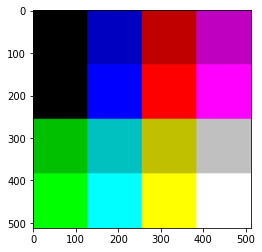

Zoom out bilineal


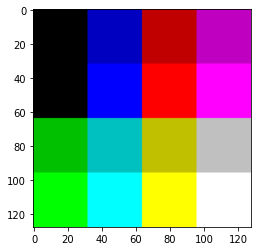

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Leer una imagen
img = plt.imread("test_1.jpg")


# Interpolar valores desconocidos
def zoom_in_bilineal(array_in):
    # Obtener la dimensión de la imagen
    height, width, t = img.shape
    t = 3

    # Tamaño nuevo
    new_width = width * 2
    new_height = height * 2

    # Creamos una imagen negra del doble de tamaño
    resized_image = np.zeros((new_height, new_width, t))

    for i in range(new_height):
        for j in range(new_width):
            # Obtenemos la posicion relativa en la nueva imagen
            new_x = j / new_width
            new_y = i / new_height

            # Buscamos las coordenadas reales en la imagen
            x = (new_x * width)
            y = (new_y * height)

            # Obtenemos los 2x2 más cercanos
            x1 = int(np.floor(x))
            x2 = x1 + 1
            y1 = int(np.floor(y))
            y2 = y1 + 1

            # Corregimos en caso de que se pase
            x1 = min(x1, width - 1)
            x2 = min(x2, width - 1)
            y1 = min(y1, height - 1)
            y2 = min(y2, height - 1)

            # Interpola la imagen con los 2x2 mas cercanos
            for k in range(3):
                resized_image[i][j][k] = (1. - (y2 - y)) * (
                        array_in[y2][x1][k] * (x2 - x) + array_in[y2][x2][k] * (1. - (x2 - x))) \
                                         + (y2 - y) * (array_in[y1][x1][k] * (x2 - x) + array_in[y1][x2][k]
                                                       * (1. - (x2 - x)))

    # Guardamos la imagen en disco
    plt.imsave('test_bigger_bilineal.png', resized_image)

    # Mostramos la imagen en pantalla
    print('Zoom in bilineal')
    plt.imshow(resized_image, vmin=0, vmax=1)
    plt.show()


zoom_in_bilineal(img)


def zoom_out_bilineal(array_in):
    # Obtener la dimensión de la imagen
    height, width, t = img.shape
    t = 3

    # Tamaño nuevo
    new_width = width // 2
    new_height = height // 2

    # Creamos una imagen negra de la mitad del tamaño
    resized_image = np.zeros((new_height, new_width, t))

    for i in range(new_height):
        for j in range(new_width):
            # Obtenemos la posicion relativa en la nueva imagen
            new_x = j / new_width
            new_y = i / new_height

            # Buscamos las coordenadas reales en la imagen
            x = (new_x * width)
            y = (new_y * height)

            # Obtenemos los 2x2 más cercanos
            x1 = int(np.floor(x))
            x2 = x1 + 1
            y1 = int(np.floor(y))
            y2 = y1 + 1

            # Corregimos en caso de que se pase
            x1 = min(x1, width - 1)
            x2 = min(x2, width - 1)
            y1 = min(y1, height - 1)
            y2 = min(y2, height - 1)

            # Interpola la imagen con los 2x2 mas cercanos
            for k in range(3):
                resized_image[i][j][k] = (1. - (y2 - y)) * (
                        array_in[y2][x1][k] * (x2 - x) + array_in[y2][x2][k] * (1. - (x2 - x))) \
                                         + (y2 - y) * (array_in[y1][x1][k] * (x2 - x) + array_in[y1][x2][k]
                                                       * (1. - (x2 - x)))

    # Guardamos la imagen en disco
    plt.imsave('test_smaller_bilineal.png', resized_image)

    # Mostramos la imagen en pantalla
    print('Zoom out bilineal')
    plt.imshow(resized_image, vmin=0, vmax=1)
    plt.show()


zoom_out_bilineal(img)


### Bicúbica

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Zoom in bicubic


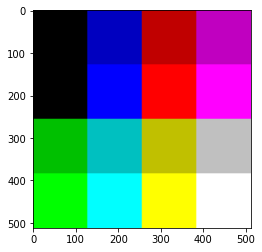

Zoom out bicubic


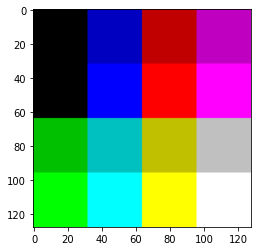

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Leer una imagen
img = plt.imread("test_1.jpg")


# Usando el algoritmo de convulación bicúbica obtenemos el peso de la siguiente forma
def weight(x):
    x = abs(x)
    if 0 <= x <= 1:
        return (-0.5 + 2) * (x ** 3) - (-0.5 + 3) * (x ** 2) + 1
    elif 1 < x <= 2:
        return -0.5 * (x ** 3) - (5 * -0.5) * (x ** 2) + (8 * -0.5) * x - 4 * -0.5
    return 0


def zoom_in_bicubic(img):
    # Obtener la dimensión de la imagen
    height, width, t = img.shape

    # Agrandamos la imagen y copiamos el borde para que no haya problemas en los bordes al hacer la interpolación
    temp_image = np.zeros((height + 4, width + 4, t))
    temp_image[2:height + 2, 2:width + 2, :t] = img
    temp_image[2:height + 2, 0:2, :t] = img[:, 0:1, :t]
    temp_image[height + 2:height + 4, 2:width + 2, :] = img[height - 1:height, :, :]
    temp_image[2:height + 2, width + 2:width + 4, :] = img[:, width - 1:width, :]
    temp_image[0:2, 2:width + 2, :t] = img[0:1, :, :t]
    temp_image[0:2, 0:2, :t] = img[0, 0, :t]
    temp_image[height + 2:height + 4, 0:2, :t] = img[height - 1, 0, :t]
    temp_image[height + 2:height + 4, width + 2:width + 4, :t] = img[height - 1, width - 1, :t]
    temp_image[0:2, width + 2:width + 4, :t] = img[0, width - 1, :t]

    # Tamaño nuevo
    new_height = math.floor(height * 2)
    new_width = math.floor(width * 2)
    t = 3

    # Creamos una imagen negra del doble de tamaño
    resized_image = np.zeros((new_height, new_width, 3))

    for c in range(t):
        for j in range(new_height):
            for i in range(new_width):
                # Buscamos las coordenadas en la imagen
                x = i / 2 + 2
                y = j / 2 + 2

                # Obtenemos las puntas de los 4x4 más cercanos
                x1 = 1 + x - math.floor(x)
                x2 = x - math.floor(x)
                x3 = math.floor(x) + 1 - x
                x4 = math.floor(x) + 2 - x
                y1 = 1 + y - math.floor(y)
                y2 = y - math.floor(y)
                y3 = math.floor(y) + 1 - y
                y4 = math.floor(y) + 2 - y

                # Obtenemos el peso de los 4x4 más cercanos para hacer la ponderación
                weight_left = np.asarray([[weight(x1), weight(x2), weight(x3), weight(x4)]])
                weight_right = np.asarray([[weight(y1)], [weight(y2)], [weight(y3)], [weight(y4)]])

                # Obtenemos los 4x4 más cercanos para hacer la ponderación
                matrix_closest = np.asarray(
                    [[temp_image[int(y - y1), int(x - x1), c], temp_image[int(y - y2), int(x - x1), c],
                      temp_image[int(y + y3), int(x - x1), c], temp_image[int(y + y4), int(x - x1), c]],
                     [temp_image[int(y - y1), int(x - x2), c], temp_image[int(y - y2), int(x - x2), c],
                      temp_image[int(y + y3), int(x - x2), c], temp_image[int(y + y4), int(x - x2), c]],
                     [temp_image[int(y - y1), int(x + x3), c], temp_image[int(y - y2), int(x + x3), c],
                      temp_image[int(y + y3), int(x + x3), c], temp_image[int(y + y4), int(x + x3), c]],
                     [temp_image[int(y - y1), int(x + x4), c], temp_image[int(y - y2), int(x + x4), c],
                      temp_image[int(y + y3), int(x + x4), c], temp_image[int(y + y4), int(x + x4), c]]])

                # Interpola la imagen con los 4x4 más cercanos
                pixel = np.dot(np.dot(weight_left, matrix_closest), weight_right)

                # Asignamos el valor al pixel
                resized_image[j, i, c] = pixel

    # Mostramos la imagen en pantalla
    print('Zoom in bicubic')
    plt.imshow(resized_image, vmin=0, vmax=1)
    plt.show()


zoom_in_bicubic(img)


def zoom_out_bicubic(img):
    # Obtener la dimensión de la imagen
    height, width, t = img.shape

    # Agrandamos la imagen y copiamos el borde para que no haya problemas en los bordes al hacer la interpolación
    temp_img = np.zeros((height + 4, width + 4, t))
    temp_img[2:height + 2, 2:width + 2, :t] = img
    temp_img[2:height + 2, 0:2, :t] = img[:, 0:1, :t]
    temp_img[height + 2:height + 4, 2:width + 2, :] = img[height - 1:height, :, :]
    temp_img[2:height + 2, width + 2:width + 4, :] = img[:, width - 1:width, :]
    temp_img[0:2, 2:width + 2, :t] = img[0:1, :, :t]
    temp_img[0:2, 0:2, :t] = img[0, 0, :t]
    temp_img[height + 2:height + 4, 0:2, :t] = img[height - 1, 0, :t]
    temp_img[height + 2:height + 4, width + 2:width + 4, :t] = img[height - 1, width - 1, :t]
    temp_img[0:2, width + 2:width + 4, :t] = img[0, width - 1, :t]

    # Tamaño nuevo
    new_height = math.floor(height // 2)
    new_width = math.floor(width // 2)
    t = 3

    # Creamos una imagen negra de la mitad del tamaño
    resized_image = np.zeros((new_height, new_width, 3))

    for c in range(t):
        for j in range(new_height):
            for i in range(new_width):
                # Buscamos las coordenadas en la imagen
                x = i * 2 + 2
                y = j * 2 + 2
                
                # Obtenemos las puntas de los 4x4 más cercanos
                x1 = 1 + x - math.floor(x)
                x2 = x - math.floor(x)
                x3 = math.floor(x) + 1 - x
                x4 = math.floor(x) + 2 - x
                y1 = 1 + y - math.floor(y)
                y2 = y - math.floor(y)
                y3 = math.floor(y) + 1 - y
                y4 = math.floor(y) + 2 - y

                # Obtenemos el peso de los 4x4 más cercanos para hacer la ponderación
                weight_left = np.asarray([[weight(x1), weight(x2), weight(x3), weight(x4)]])
                weight_right = np.asarray([[weight(y1)], [weight(y2)], [weight(y3)], [weight(y4)]])

                # Obtenemos los 4x4 más cercanos para hacer la ponderación
                matrix_closest = np.asarray(
                    [[temp_img[int(y - y1), int(x - x1), c], temp_img[int(y - y2), int(x - x1), c],
                      temp_img[int(y + y3), int(x - x1), c], temp_img[int(y + y4), int(x - x1), c]],
                     [temp_img[int(y - y1), int(x - x2), c], temp_img[int(y - y2), int(x - x2), c],
                      temp_img[int(y + y3), int(x - x2), c], temp_img[int(y + y4), int(x - x2), c]],
                     [temp_img[int(y - y1), int(x + x3), c], temp_img[int(y - y2), int(x + x3), c],
                      temp_img[int(y + y3), int(x + x3), c], temp_img[int(y + y4), int(x + x3), c]],
                     [temp_img[int(y - y1), int(x + x4), c], temp_img[int(y - y2), int(x + x4), c],
                      temp_img[int(y + y3), int(x + x4), c], temp_img[int(y + y4), int(x + x4), c]]])

                # Interpola la imagen con los 4x4 más cercanos
                pixel = np.dot(np.dot(weight_left, matrix_closest), weight_right)

                # Asignamos el valor al pixel
                resized_image[j, i, c] = pixel

    # Mostramos la imagen en pantalla
    print('Zoom out bicubic')
    plt.imshow(resized_image, vmin=0, vmax=1)
    plt.show()


zoom_out_bicubic(img)

## Comparación

Primera imagen
Zoom in closest


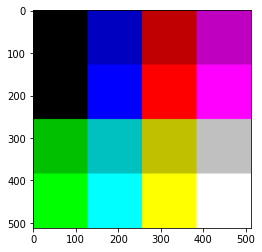

Zoom in bilineal


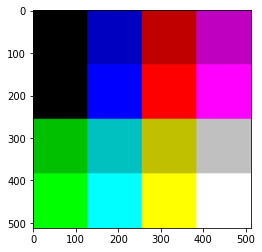

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Zoom out bicubic


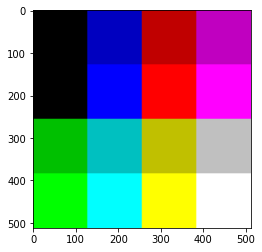

Zoom out closest


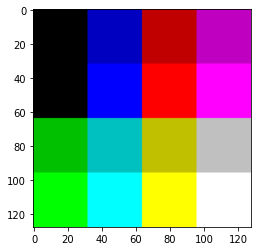

Zoom out bilineal


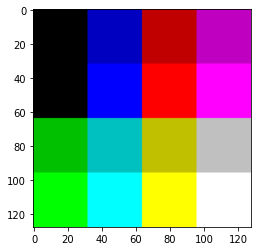

Zoom out bicubic


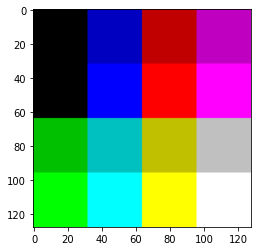

Segunda imagen
Zoom in closest


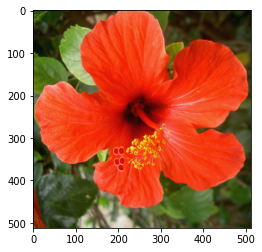

Zoom in bilineal


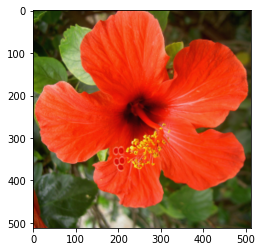

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Zoom out bicubic


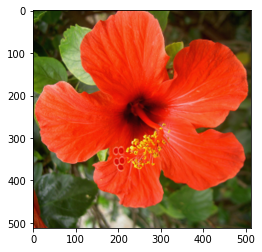

Zoom out closest


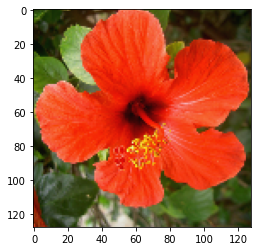

Zoom out bilineal


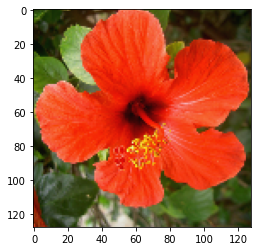

Zoom out bicubic


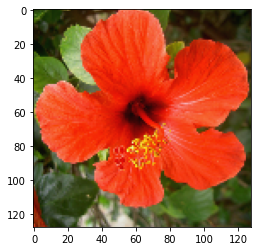

Tercera imagen
Zoom in closest


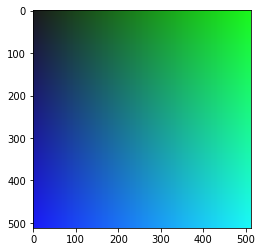

Zoom in bilineal


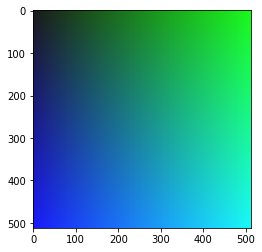

Zoom out bicubic


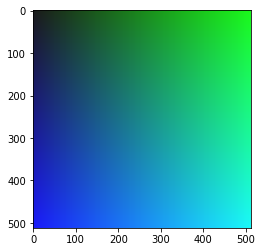

Zoom out closest


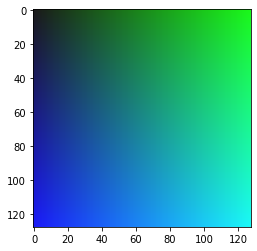

Zoom out bilineal


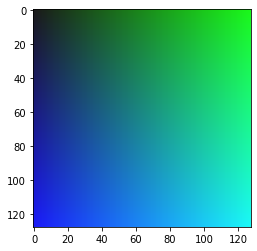

Zoom out bicubic


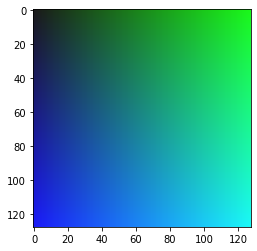

In [6]:
img = plt.imread("test_1.jpg")
img2 = plt.imread("test_2.jpg")
img3 = plt.imread("test_3.jpg")
print('Primera imagen')
zoom_in_closest(img)
zoom_in_bilineal(img)
zoom_in_bicubic(img)

zoom_out_closest(img)
zoom_out_bilineal(img)
zoom_out_bicubic(img)

print('Segunda imagen')
zoom_in_closest(img2)
zoom_in_bilineal(img2)
zoom_in_bicubic(img2)

zoom_out_closest(img2)
zoom_out_bilineal(img2)
zoom_out_bicubic(img2)

print('Tercera imagen')
zoom_in_closest(img3)
zoom_in_bilineal(img3)
zoom_in_bicubic(img3)

zoom_out_closest(img3)
zoom_out_bilineal(img3)
zoom_out_bicubic(img3)

## Conclusiones
Después de realizar las interpolaciones con los distintos métodos llegamos a las siguientes conclusiones:
La interpolación por vecino más cercano es la más rápida ya que tiene en cuenta un solo pixel y no tiene que realizar fórmulas como los otros métodos, pero el costo de esto es que al reescalar la imagen se generan cambios de color bruscos dejando en evidencia los defectos de tomar en cuenta pocos valores.
La interpolación bilineal es un poco más costosa que la anterior ya que realiza una ponderación con los vecinos 2x2 más cercanos, pero el beneficio de esto es que las transiciones de colores son más amortiguadas y no se generan cambios tan bruscos lo que hace que la imagen no parezca tan "pixelada". Esto se puede ver en la imagen 1 como las intersecciones de colores tienen cambios leves aunque en la imagen normal no estén.
Por último, la interpolación bicúbica es la más costosa de todas ya que realiza una ponderación con los vecinos 4x4 más cercanos lo que hace que tarde un gran tiempo. Esto trae como beneficio que las transiciones entre colores son mucho más amortiguadas que en la bilineal y no se van a ver "pixeladas".
Si se desea reescalar una imagen y el tiempo de ejecución no es crucial la interpolación bicúbica es la mejor opción, pero si este es un factor importante la interpolación bilineal es una opción muy recomendada ya que por un costo un poco mayor al de interpolación por vecinos más cercanos se generan imágenes con cambios muy leves de colores, proporcionando una mejor imágen que las de éste.